In [1]:
# Here I will be looking at the Recruit Restaurant Visitor Forecasting dataset from Kaggle

In [2]:
# From data source:

# -Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online

# -AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

# Files:
    
# air_reserve.csv - This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

# hpg_reserve.csv - This file contains reservations made in the hpg system.

# air_store_info.csv - This file contains information about select air restaurants. Column names and contents are self-explanatory.

# hpg_store_info.csv - This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

# store_id_relation.csv - This file allows you to join select restaurants that have both the air and hpg system.

# air_visit_data.csv - This file contains historical visit data for the air restaurants.

# date_info.csv - This file gives basic information about the calendar dates in the dataset.


In [3]:
import os,sys
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import descartes
import geopandas as gpd

In [4]:
air_reserve = pd.read_csv('../Datasets/restaurants_japan/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
air_store = pd.read_csv('../Datasets/restaurants_japan/air_store_info.csv')
hpg_reserve = pd.read_csv('../Datasets/restaurants_japan/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_store = pd.read_csv('../Datasets/restaurants_japan/hpg_store_info.csv')
air_visit = pd.read_csv('../Datasets/restaurants_japan/air_visit_data.csv')
store_id_relation = pd.read_csv('../Datasets/restaurants_japan/store_id_relation.csv')
date_info = pd.read_csv('../Datasets/restaurants_japan/date_info.csv')

In [5]:
# We can combine the air and hpg csvs into singular dataframes

In [6]:
df_hpg = pd.merge(hpg_reserve, hpg_store, on='hpg_store_id')
df_air = pd.merge(air_reserve, air_store, on='air_store_id')

In [7]:
df_hpg_relation = pd.merge(df_hpg,store_id_relation, how='left', on = 'hpg_store_id')
df_air_relation = pd.merge(df_air,store_id_relation, how='left', on = 'air_store_id')

In [8]:
# Merge all

df_full = pd.merge(df_hpg_relation,df_air_relation, how='outer')

In [9]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi


In [10]:
# Change dates to ensure datetime objects
df_air['visit_datetime'] = pd.to_datetime(df_air['visit_datetime'])
df_air['reserve_datetime'] = pd.to_datetime(df_air['reserve_datetime'])
df_hpg['visit_datetime'] = pd.to_datetime(df_hpg['visit_datetime'])
df_hpg['reserve_datetime'] = pd.to_datetime(df_hpg['reserve_datetime'])
df_full['visit_datetime'] = pd.to_datetime(df_full['visit_datetime'])
df_full['reserve_datetime'] = pd.to_datetime(df_full['reserve_datetime'])

In [11]:
# Cumulating the reserve times and visit, adding up all the visitors
cum_df_reserve = df_full.groupby(['reserve_datetime']).sum().sort_values(by=['reserve_datetime'],ascending=True)
cum_df_visit = df_full.groupby(['visit_datetime']).sum().sort_values(by=['visit_datetime'],ascending=True)


In [12]:
cum_df_reserve.head()

,reserve_visitors,latitude,longitude
reserve_datetime,,,
2016-01-01 00:00:00,90,704.917747,2642.569365
2016-01-01 01:00:00,57,415.084550,1509.784428
2016-01-01 02:00:00,15,195.043211,701.673945
2016-01-01 03:00:00,27,174.709774,686.295219
2016-01-01 04:00:00,40,211.888717,818.645405


In [13]:
cum_df_visit.head()

,reserve_visitors,latitude,longitude
visit_datetime,,,
2016-01-01 13:00:00,3,34.692109,135.191698
2016-01-01 17:00:00,35,471.788971,1790.502448
2016-01-01 18:00:00,84,876.081696,3401.770555
2016-01-01 19:00:00,106,1239.450177,4759.756826
2016-01-01 20:00:00,26,321.175790,1224.093007


In [14]:
# Doing some clustering


# There are 8 regions in Japan -> 8 clusters: https://en.wikipedia.org/wiki/List_of_regions_of_Japan

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12).fit(df_full[['longitude','latitude']])
df_full['cluster'] = kmeans.predict(df_full[['longitude','latitude']])
cluster_centers = kmeans.cluster_centers_

In [15]:
# This is the location of the centers of clusters
cluster_centers

array([[137.73607962,  34.71927621],
       [132.4666604 ,  34.3944754 ],
       [141.32933868,  43.00328219],
       [135.02359857,  34.7268448 ],
       [139.67880953,  35.67611687],
       [130.5142751 ,  33.6349562 ],
       [139.00348924,  37.81631394],
       [140.87764688,  38.27511918],
       [142.55745313,  43.69576837],
       [138.45335351,  34.99171211],
       [133.36215122,  34.48923642],
       [135.50678742,  34.68742671]])

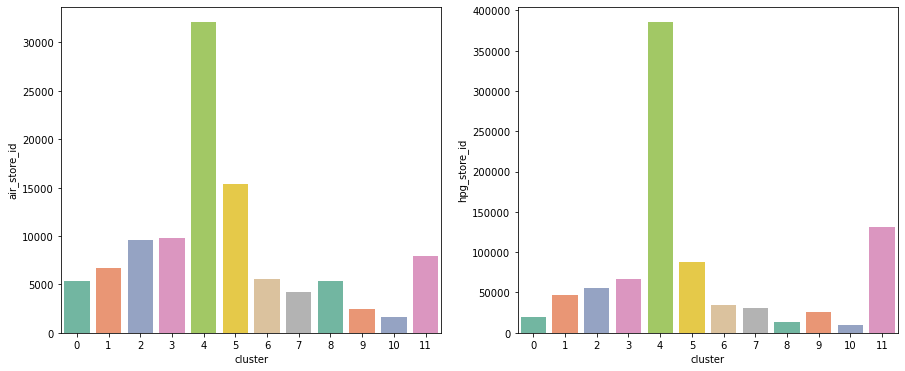

In [16]:
# Looking at cluster histograms
fig,ax = plt.subplots(1,2,figsize=(15,6))
cluster_histogram = df_full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['air_store_id'],ax=ax[0], palette= "Set2")
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['hpg_store_id'],ax=ax[1], palette= "Set2")
plt.show()

In [17]:
cluster_histogram

,cluster,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,0,19405,22417,22417,22417,17479,17479,22417,22417,5306,4938,4938
1,1,47429,50225,50225,50225,44175,44175,50225,50225,6649,6050,6050
2,2,55174,59459,59459,59459,51135,51135,59459,59459,9588,8324,8324
3,3,66771,71610,71610,71610,63317,63317,71610,71610,9771,8293,8293
4,4,385196,401934,401934,401934,372936,372936,401934,401934,32094,28998,28998
5,5,87283,96026,96026,96026,82756,82756,96026,96026,15362,13270,13270
6,6,34637,36354,36354,36354,32368,32368,36354,36354,5537,3986,3986
7,7,30954,34913,34913,34913,30711,30711,34913,34913,4202,4202,4202
8,8,13542,16092,16092,16092,11910,11910,16092,16092,5364,4182,4182
9,9,26115,27398,27398,27398,24981,24981,27398,27398,2417,2417,2417


In [18]:
# Defining cluster count
cluster_count = cluster_histogram['cluster'].count()

In [19]:
# Define a base map
japan_map = gpd.read_file("../Datasets/restaurants_japan/Igismap/Japan_Boundary.shp")

In [20]:
# Defining colormaps for clusters
cm = plt.get_cmap('Set2')
colors = [cm(2.*i/cluster_count) for i in range(cluster_count)]
colored = [colors[i] for i in df_full['cluster']]

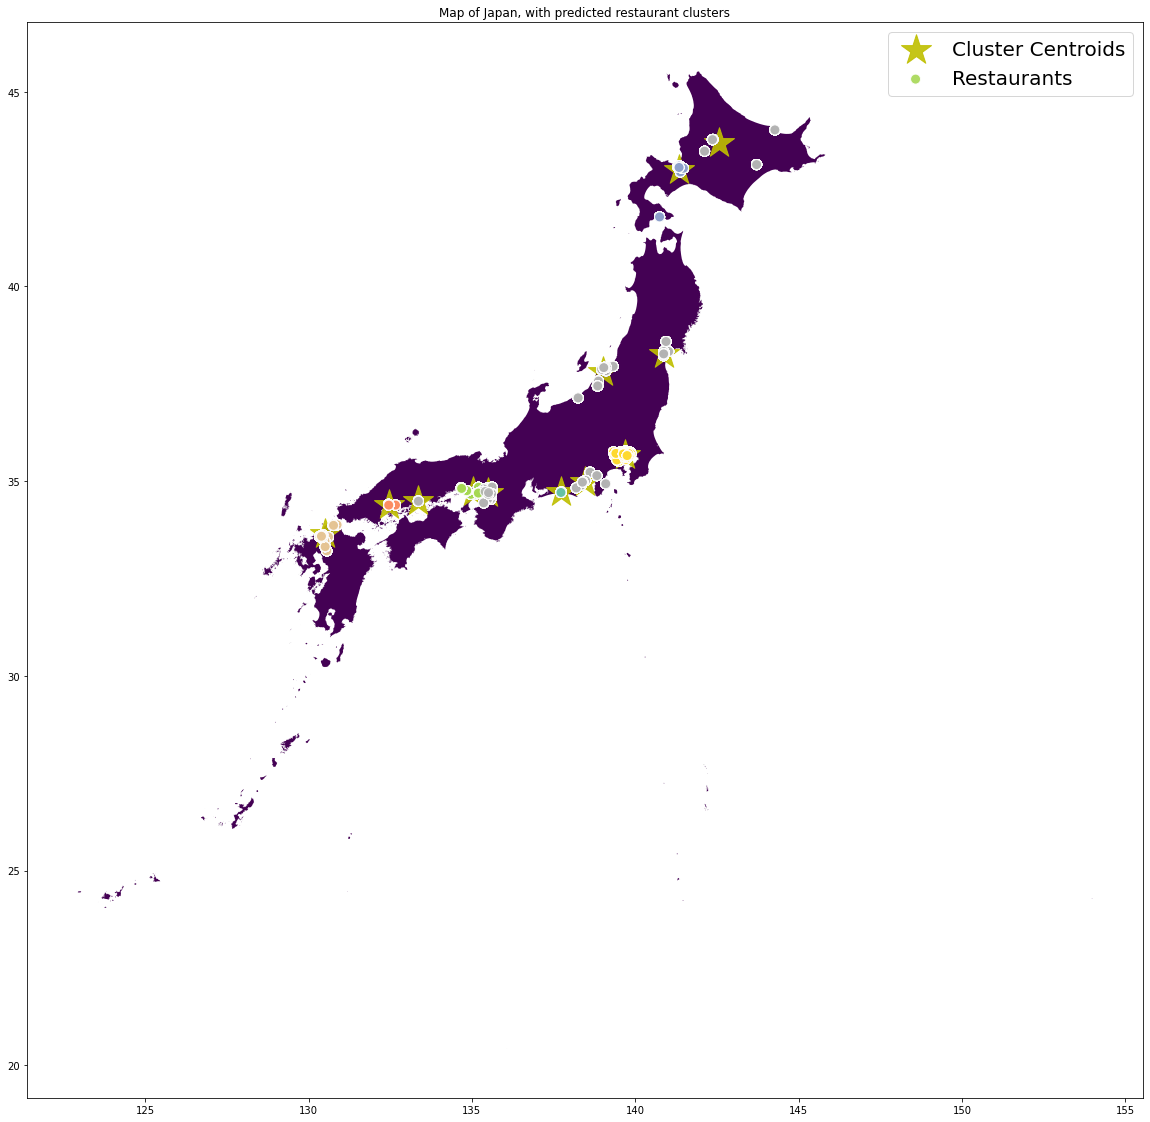

In [21]:

fig,ax = plt.subplots(figsize = (20,20))
# Base map
ax1 = japan_map.plot(ax = ax,cmap = 'viridis')
# Plotting cluster centroids 
x = cluster_centers[:,0]
y = cluster_centers[:,1]
ax2 = ax.scatter(x,y ,c= 'y', s = 1000,alpha = 0.9, edgecolors='y', label = 'Cluster Centroids', marker='*')
# Plotting restaurants 
x2 = df_full['longitude']
y2 = df_full['latitude']
ax3 = ax.scatter(x2,y2 ,c= colored, s = 100 , alpha = 0.9,edgecolors='w',label = 'Restaurants')

plt.legend(prop={'size': 20})
plt.title('Map of Japan, with predicted restaurant clusters')


plt.show()

In [22]:
# Looking at aggregations for day of the week, hours of the day

#Group by days
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
week_df_visit = df_full.groupby(df_full['visit_datetime'].dt.day_name()).count().reindex(days)

In [23]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,4
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,4
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,4
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,11


In [24]:
# Looking at times
time_df_visit = df_full
time_df_visit.index = time_df_visit['visit_datetime']

time_df_visit = time_df_visit.drop(['latitude','longitude'], axis = 1)

In [25]:
time_df_visit = time_df_visit.groupby(time_df_visit.index.hour).count()

In [26]:
time_df_visit.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,air_store_id,air_genre_name,air_area_name,cluster
visit_datetime,,,,,,,,,,
0,1082,1308,1308,1308,878,878,450,430,430,1308
1,726,923,923,923,593,593,338,330,330,923
2,278,379,379,379,190,190,191,189,189,379
3,151,198,198,198,80,80,119,118,118,198
4,95,110,110,110,55,55,56,55,55,110


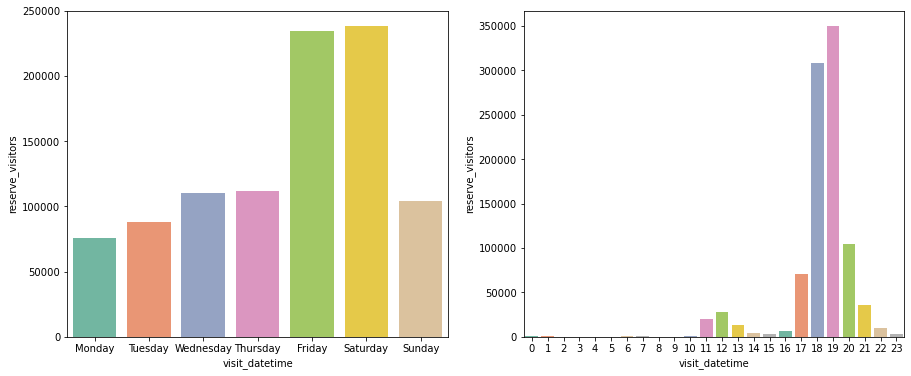

In [27]:
# Looking at time of day and day of week hisograms for actual visitors
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=week_df_visit.index,y=week_df_visit['reserve_visitors'],ax=ax[0], palette= "Set2")
sns.barplot(x=time_df_visit.index,y=time_df_visit['reserve_visitors'],ax=ax[1], palette= "Set2")
plt.show()

In [28]:
# As expected, Friday and Sturday dinner times are massively more statistically relevant than other times and days

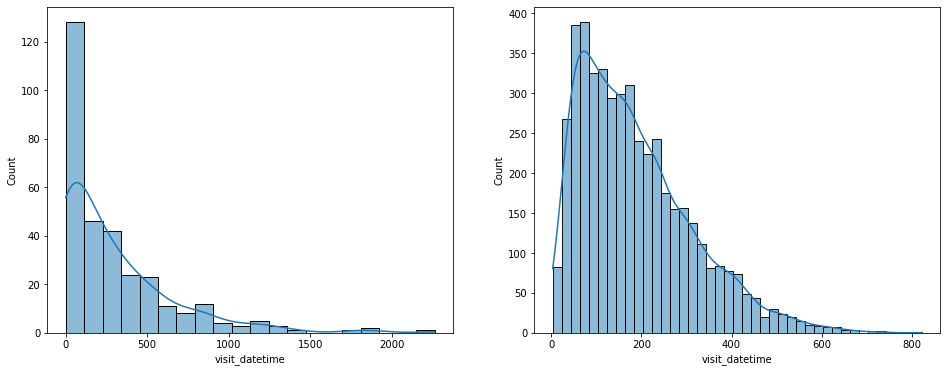

In [29]:
# Distribution of
fig,ax = plt.subplots(1,2,figsize=(16,6))
air_histogram = df_air.groupby(['air_store_id']).count()
sns.histplot(air_histogram['visit_datetime'], kde = True, ax=ax[0])
hpg_histogram = df_hpg.groupby(['hpg_store_id']).count()
sns.histplot(hpg_histogram['visit_datetime'], kde = True, ax=ax[1])
plt.show()

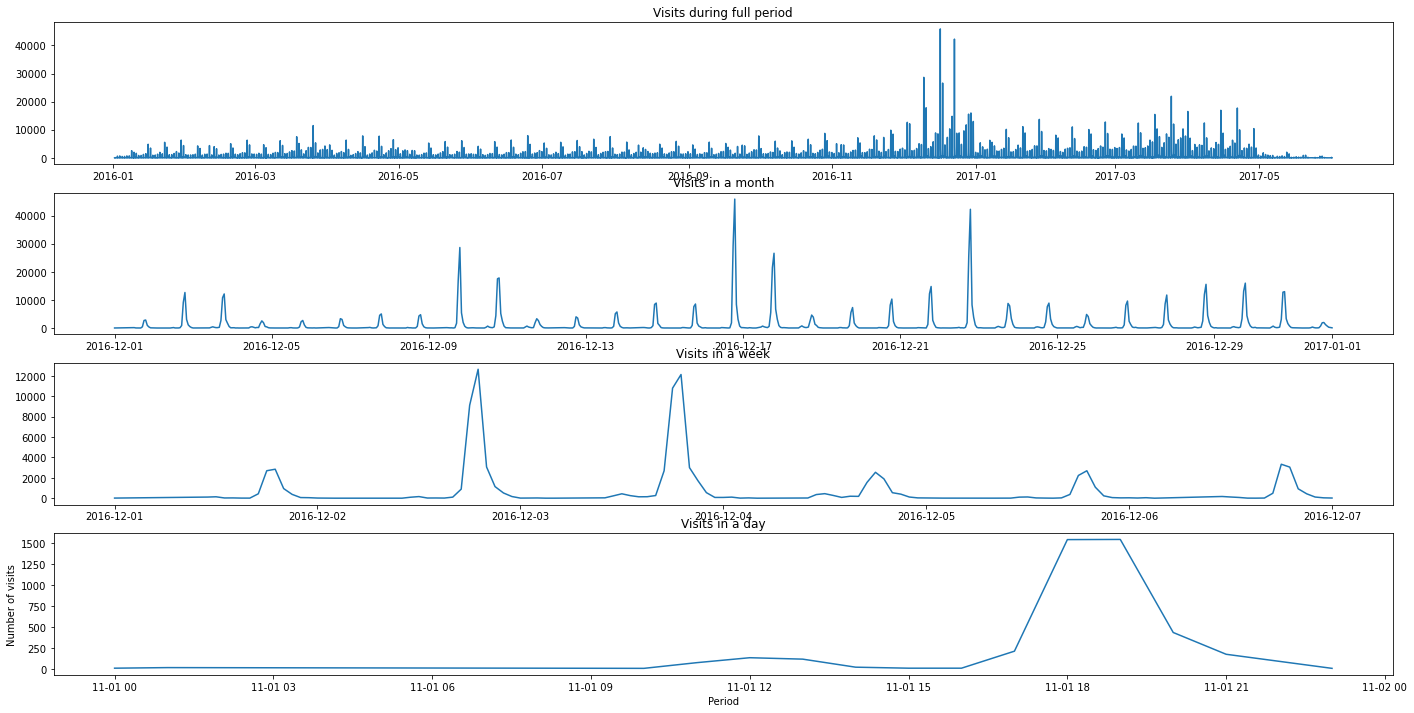

In [30]:
# Number of visits in any given day, month and week

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (24,12))
ax1.plot(cum_df_visit['reserve_visitors'])
ax1.set_title("Visits during full period")
plt.ylabel("Number of visit")
ax2.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'])
ax2.set_title("Visits in a month")
plt.ylabel("Number of visits")
ax3.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'])
ax3.set_title("Visits in a week")
plt.ylabel("Number of visits")
ax4.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'])
ax4.set_title("Visits in a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.show()

In [31]:
# Looking at discrepancy between number of reservations and actual visits for same time ranges

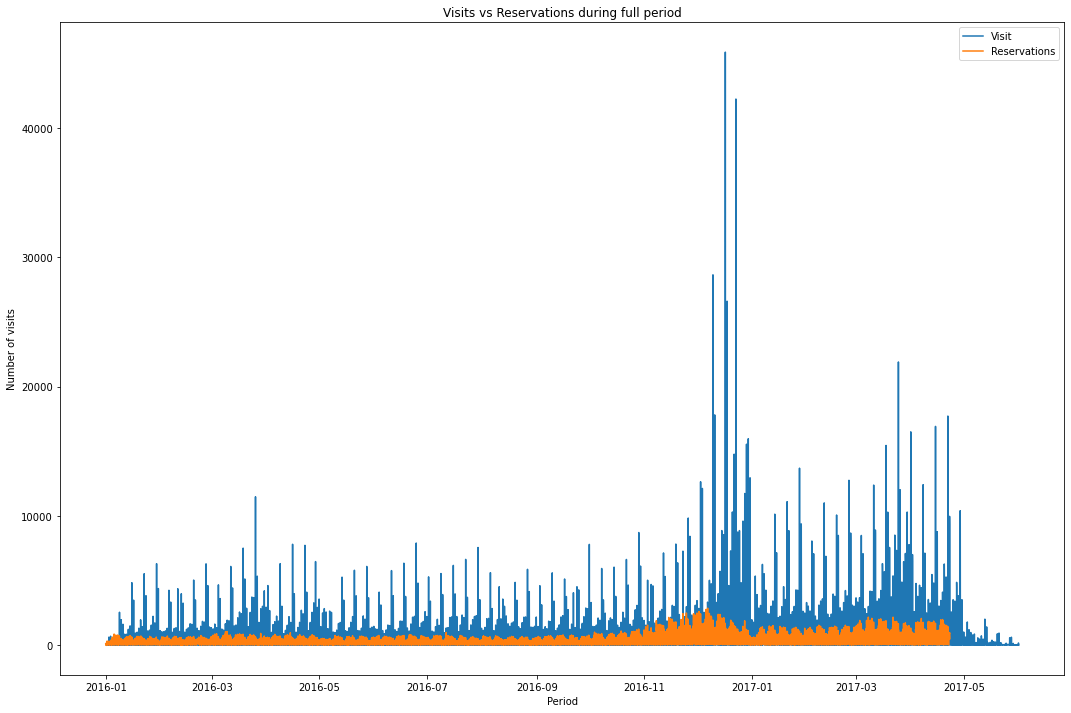

In [32]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during full period")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

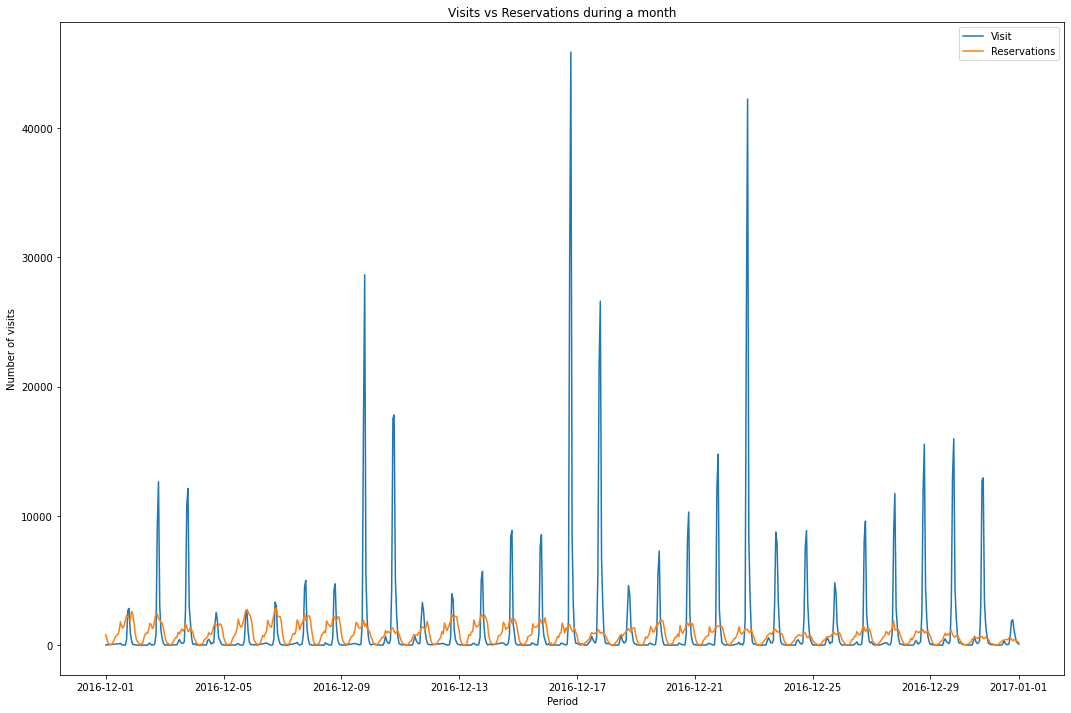

In [33]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

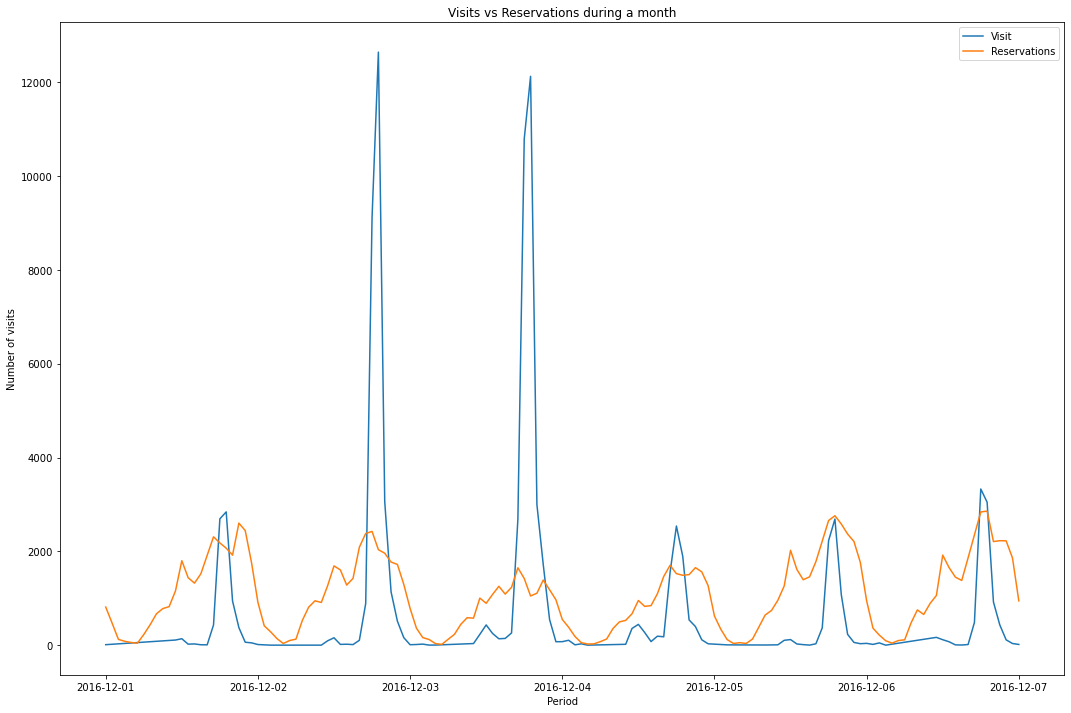

In [34]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

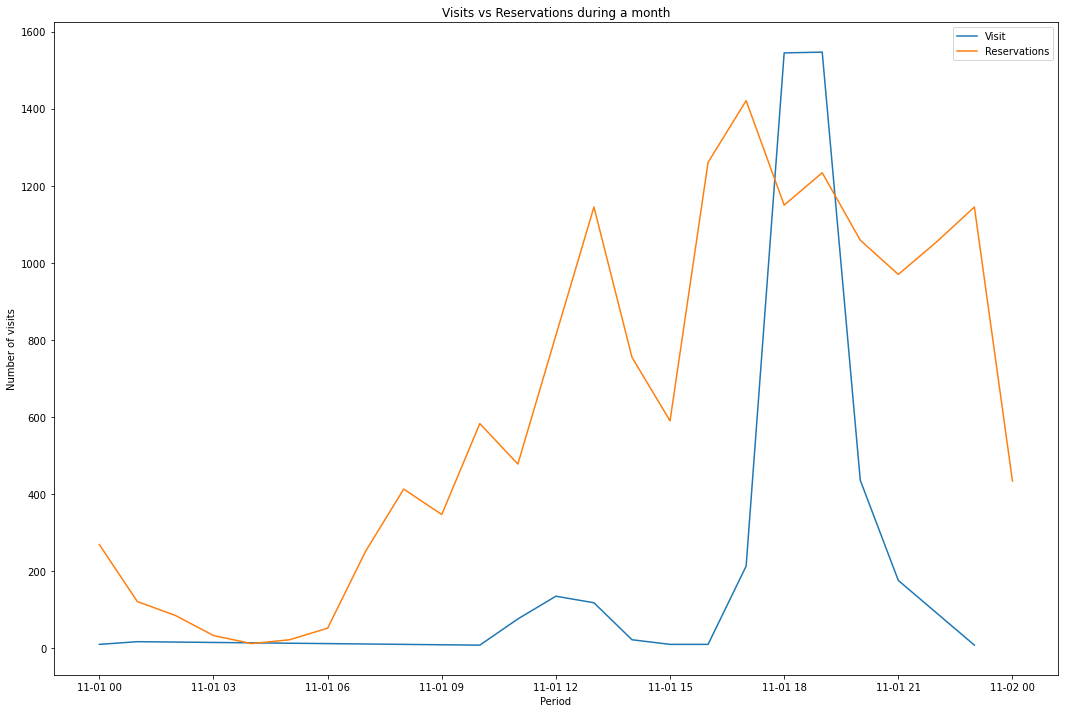

In [35]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [36]:
# Can see that in any given time window, many more people visit instead of reserve.

In [37]:
# Looking at aggregated windows

m1 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.month]).sum()
m1_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.month]).sum()
m2 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.weekday]).sum()
m2_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.weekday]).sum()
m3 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.hour]).sum()
m3_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.hour]).sum()

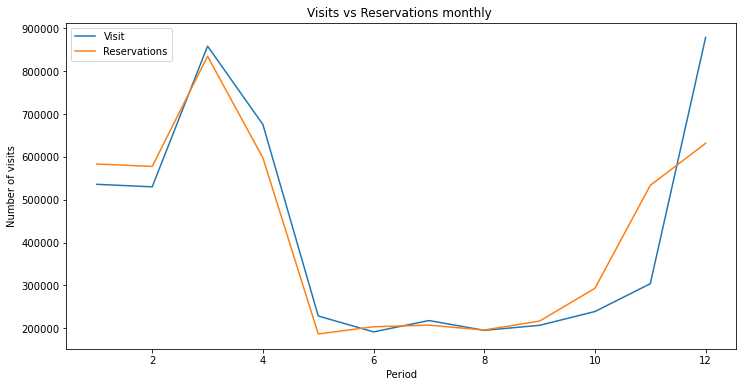

In [38]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m1, label = 'Visit')
ax1.plot(m1_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations monthly ")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [39]:
# Can be seen that this ties in well with the combination of cherry blossom period (march/april) and Christams (dec)

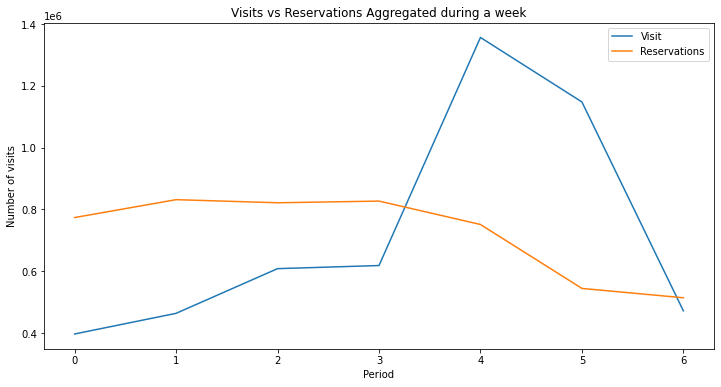

In [40]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m2, label = 'Visit')
ax1.plot(m2_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a week")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

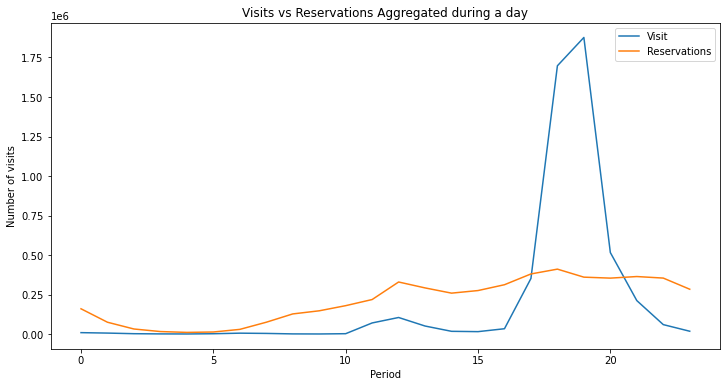

In [41]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m3, label = 'Visit')
ax1.plot(m3_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [42]:
# Now I'll explore how many visitors per genre

In [43]:
# First with air_genre
air_genre = df_air.groupby(by='air_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

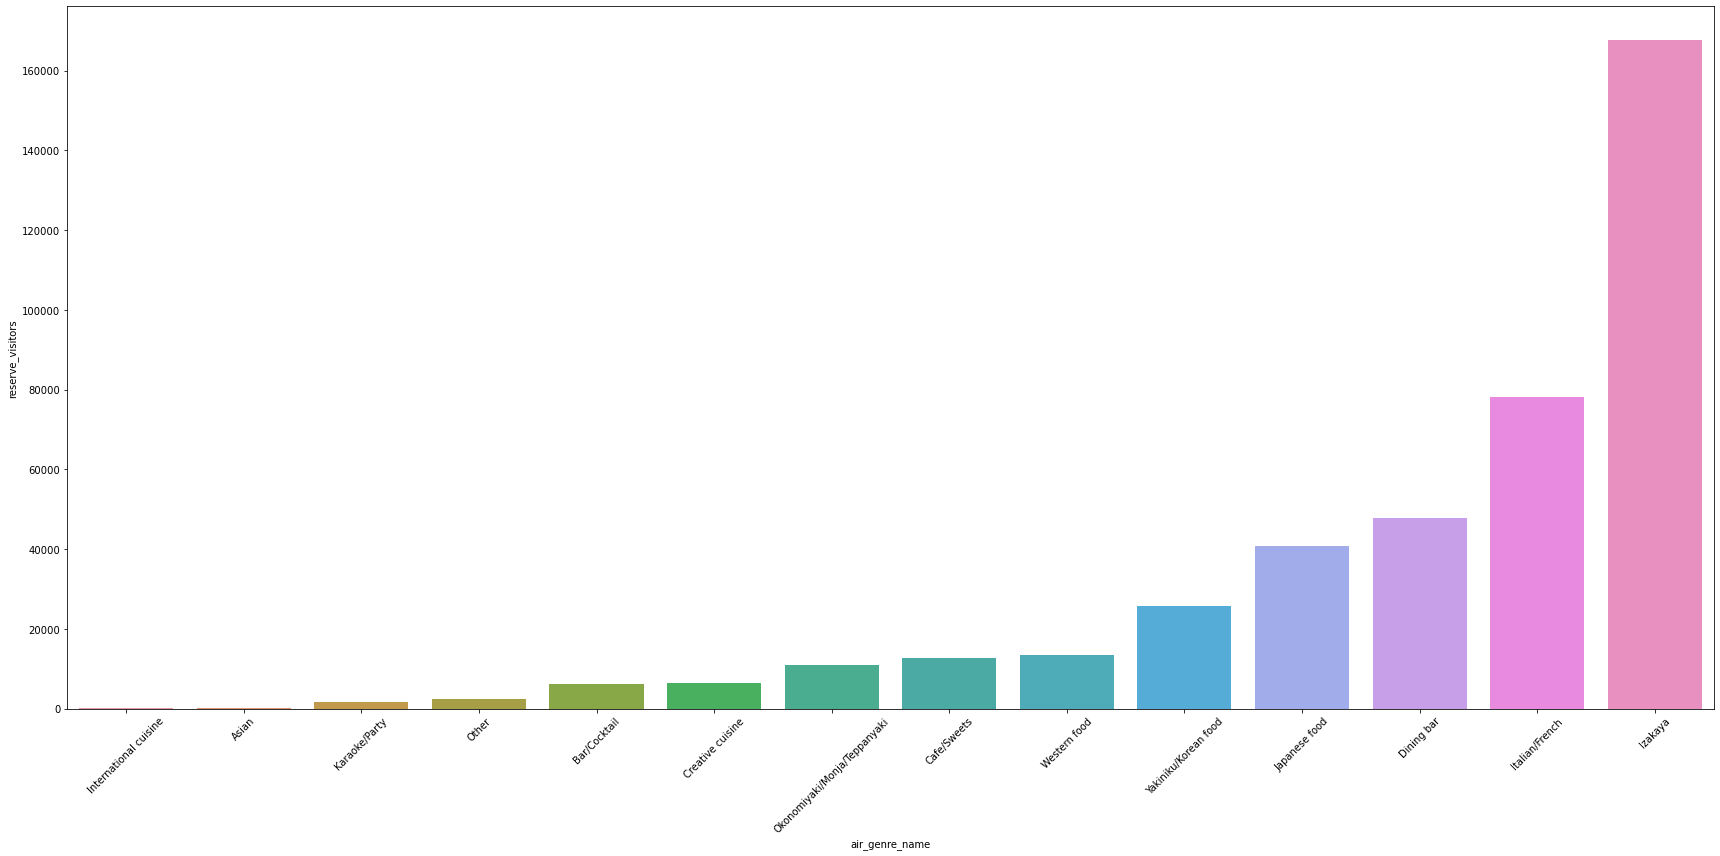

In [49]:
fig, ax = plt.subplots(figsize = (24,12))
sns.barplot(x = air_genre.index, y ='reserve_visitors', data = air_genre)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Then with with hpg_genre
hpg_genre = df_hpg.groupby(by='hpg_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

In [46]:
hpg_genre

,reserve_visitors
hpg_genre_name,
Spain/Mediterranean cuisine,531
Udon/Soba,623
Sweets,795
Shanghai food,1177
Taiwanese/Hong Kong cuisine,1445
Dim Sum/Dumplings,1609
Amusement bar,1966
Sichuan food,2809
Cantonese food,3581


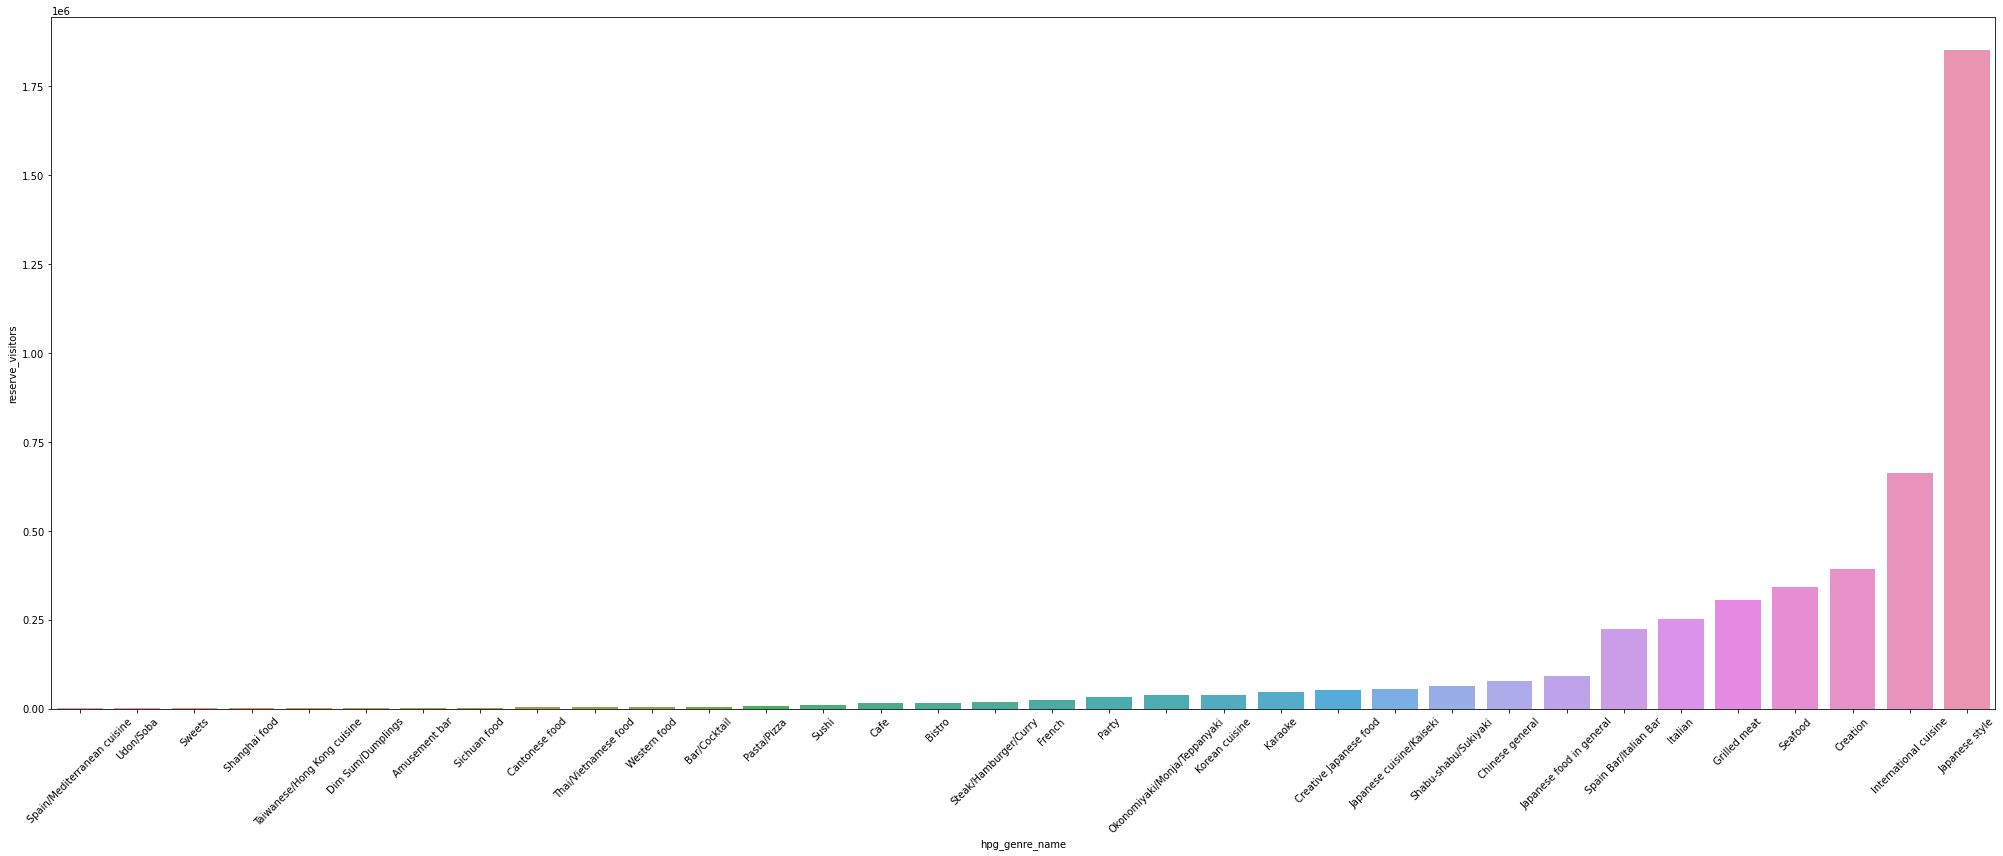

In [47]:
fig, ax = plt.subplots(figsize = (28,12))
sns.barplot(x = hpg_genre.index, y ='reserve_visitors', data = hpg_genre)
plt.xticks(rotation=45)
plt.tight_layout()

In [48]:
# Difference is large between two datasets!

# If you want to start a restaurant, you'd be better off making one that serves japanes food!

In [66]:
f = cum_df_reserve

In [83]:
f['FOO'] = f['reserve_visitors'].apply(lambda x: x*x if x%2 ==0 else 0)

In [84]:
f 

,reserve_visitors,latitude,longitude,FOO
reserve_datetime,,,,
2016-01-01 00:00:00,90,704.917747,2642.569365,8100
2016-01-01 01:00:00,57,415.084550,1509.784428,0
2016-01-01 02:00:00,15,195.043211,701.673945,0
2016-01-01 03:00:00,27,174.709774,686.295219,0
2016-01-01 04:00:00,40,211.888717,818.645405,1600
...,...,...,...,...
2017-04-22 19:00:00,858,6028.224665,22982.074751,736164
2017-04-22 20:00:00,805,6139.002528,23255.707528,0
2017-04-22 21:00:00,765,6365.016218,24352.481867,0


In [104]:
date_info['calendar_date '] = pd.to_datetime(date_info['calendar_date'])

In [108]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   calendar_date   517 non-null    object        
 1   day_of_week     517 non-null    object        
 2   holiday_flg     517 non-null    int64         
 3   calendar_date   517 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 16.3+ KB


In [117]:
date_info[date_info['holiday_flg']==1]

,calendar_date,day_of_week,holiday_flg,calendar_date
0,2016-01-01,Friday,1,2016-01-01
1,2016-01-02,Saturday,1,2016-01-02
2,2016-01-03,Sunday,1,2016-01-03
10,2016-01-11,Monday,1,2016-01-11
41,2016-02-11,Thursday,1,2016-02-11
79,2016-03-20,Sunday,1,2016-03-20
80,2016-03-21,Monday,1,2016-03-21
119,2016-04-29,Friday,1,2016-04-29
123,2016-05-03,Tuesday,1,2016-05-03
124,2016-05-04,Wednesday,1,2016-05-04


In [126]:
dates = date_info
dates.loc[dates.holiday_flg==1].loc[(dates.day_of_week !='Saturday')].loc[dates.day_of_week !='Sunday']

,calendar_date,day_of_week,holiday_flg,calendar_date
0,2016-01-01,Friday,1,2016-01-01
10,2016-01-11,Monday,1,2016-01-11
41,2016-02-11,Thursday,1,2016-02-11
80,2016-03-21,Monday,1,2016-03-21
119,2016-04-29,Friday,1,2016-04-29
123,2016-05-03,Tuesday,1,2016-05-03
124,2016-05-04,Wednesday,1,2016-05-04
125,2016-05-05,Thursday,1,2016-05-05
199,2016-07-18,Monday,1,2016-07-18
223,2016-08-11,Thursday,1,2016-08-11
